# ***Import Packages***

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# ***Load Data***

Training set shape:  (60000, 28, 28)
Test set shape:  (10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

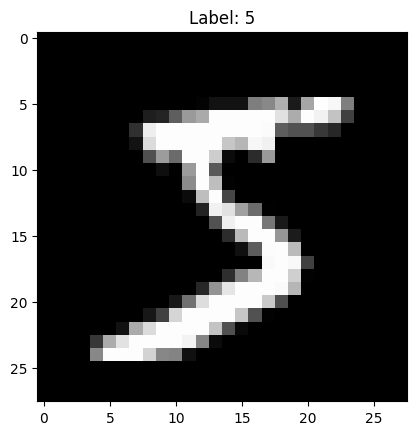

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

plt.imshow(X_train[0], cmap= 'gray')
plt.title(f"Label: {y_train[0]}")
plt.show

# **Normalise the images**

In [3]:
X_train = X_train/225.0
X_test = X_test/225.0

# ***Build Model***

In [17]:
model = Sequential([
    Input(shape = (28, 28)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10 classes for digits 0-9
])

# **Compile**

In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [6]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100)
validation_data = (X_test, y_test)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8811 - loss: 0.4082
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9692 - loss: 0.1014
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9803 - loss: 0.0644
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9840 - loss: 0.0515
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0394
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0.0281
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9921 - loss: 0.0245
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9926 - loss: 0.0206
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9944 - loss: 0.0168
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0194
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9951 - loss: 0.0150
Epoch 12/1

# ***Evaluate the Model***

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy: ", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9809 - loss: 0.2798

Test Accuracy:  0.98089998960495


# ***Make Predictions***

In [8]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


**Example**

Predicted Label:  7


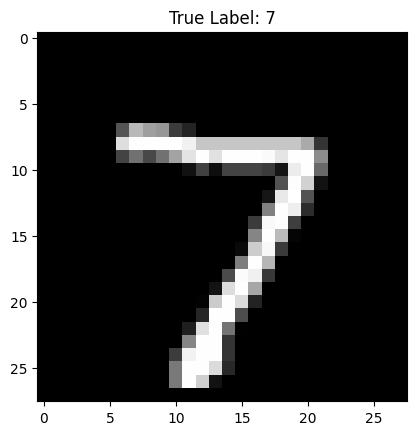

In [10]:
print("Predicted Label: ", np.argmax(predictions[0]))
plt.imshow(X_test[0], cmap = 'gray')
plt.title(f"True Label: {y_test[0]}")
plt.show()

**All Digits from 0-9**

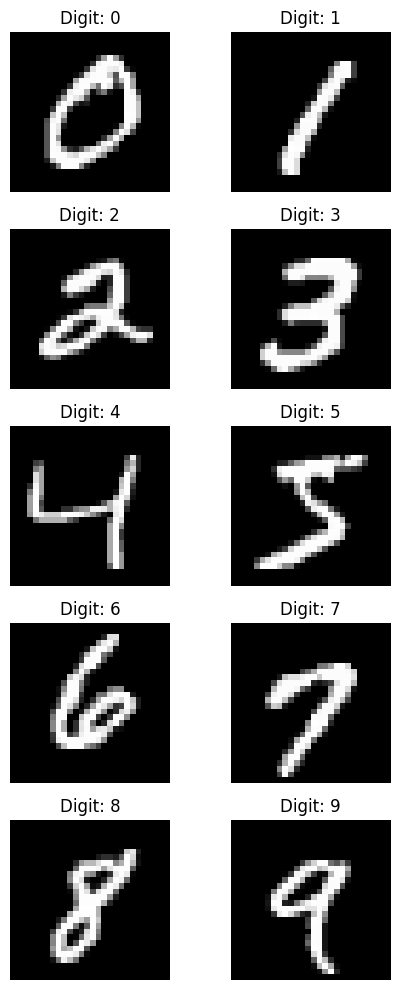

In [14]:
examples = []

for digits in range(10):
    idx = np.where(y_train == digits)[0][0]
    examples.append(X_train[idx])

fig, axes, = plt.subplots(5,2, figsize = (5,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(examples[i], cmap = 'gray')
    ax.set_title(f"Digit: {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()